# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
# cities_df = pd.read_csv("../output_data/cities.csv")
# cities_df = cities_df.set_index("City")
# cities_df

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20'

In [14]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1 

print(f"Starting data retrieval: ")
print(f"-------------------------")

for city in cities: 
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        record = record + 1
        
    except: 
        print("City not found. Will attemp something else")
        
    continue 


Starting data retrieval: 
-------------------------
Processing Record 1 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=hobart
Processing Record 2 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=sobolevo
Processing Record 3 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=ancud
Processing Record 4 | Manacapuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=manacapuru
Processing Record 5 | Klaksvík
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=klaksvik
Processing Record 6 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=vaini
Processing Record 7 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb7

Processing Record 57 | Cantanhede
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=cantanhede
Processing Record 58 | Pingliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=pingliang
Processing Record 59 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=hithadhoo
Processing Record 60 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kahului
Processing Record 61 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=provideniya
Processing Record 62 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=georgetown
Processing Record 63 | Port Hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebc

Processing Record 113 | Kitgum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kitgum
Processing Record 114 | São Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=sao%20filipe
Processing Record 115 | Kargasok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kargasok
Processing Record 116 | Novo Oriente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=novo%20oriente
Processing Record 117 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=lata
Processing Record 118 | Samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=samarai
Processing Record 119 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa659

Processing Record 169 | Shiyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=shiyan
Processing Record 170 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=saint%20george
Processing Record 171 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=faanui
Processing Record 172 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=pevek
Processing Record 173 | Foso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=foso
Processing Record 174 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=saint-philippe
Processing Record 175 | Girona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be2

Processing Record 223 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=norman%20wells
Processing Record 224 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=comodoro%20rivadavia
Processing Record 225 | Miles City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=miles%20city
Processing Record 226 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=hobyo
Processing Record 227 | Alekseyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=alekseyevka
Processing Record 228 | Athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=athabasca
Processing Record 229 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 278 | Bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=bengkulu
City not found. Will attemp something else
Processing Record 279 | Nanpiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=nanpiao
Processing Record 280 | Njinikom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=njinikom
Processing Record 281 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=luderitz
Processing Record 282 | Paka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=paka
Processing Record 283 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=los%20llanos%20de%20aridane
Processing Record 284 | Iwaki
http://api.openweathermap.org/data/

Processing Record 333 | Punta Gorda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=punta%20gorda
City not found. Will attemp something else
Processing Record 334 | Kumul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=hami
Processing Record 335 | Tomatlán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=tomatlan
Processing Record 336 | Teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=teya
Processing Record 337 | Burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=burnie
Processing Record 338 | Nicoya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=nicoya
Processing Record 339 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb71

Processing Record 388 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=luanda
Processing Record 389 | Kerman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kerman
Processing Record 390 | Bahía de Caráquez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=bahia%20de%20caraquez
City not found. Will attemp something else
Processing Record 391 | Marabá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=maraba
Processing Record 392 | Luwuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=luwuk
Processing Record 393 | Hūn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=hun
Processing Record 394 | Conceição da Barra
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 443 | Thayetmyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=thayetmyo
Processing Record 444 | Pavino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=pavino
Processing Record 445 | Kitimat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kitimat
Processing Record 446 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=nantucket
Processing Record 447 | Staryy Nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=staryy%20nadym
Processing Record 448 | Westminster
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=westminster
Processing Record 449 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce

Processing Record 499 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=santa%20maria
Processing Record 500 | Shirgaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=shirgaon
Processing Record 501 | Bač
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=bac
Processing Record 502 | Gondanglegi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=gondanglegi
Processing Record 503 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=chara
City not found. Will attemp something else
Processing Record 504 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=tura
Processing Record 505 | Coxim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 556 | Tuy Hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=tuy%20hoa
City not found. Will attemp something else
Processing Record 557 | Fontanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=fontanka
Processing Record 558 | Ban Nahin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=ban%20nahin
Processing Record 559 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=ostrovnoy
City not found. Will attemp something else
Processing Record 560 | Kapoeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=kapoeta
Processing Record 561 | Jaicós
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0cb715c1de69ebce9d0d6fa65911be20&q=jaicos
Processing Record 562 | San Francisco
http:/

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country": country,
    "Lat":lat,
    "Lang": lng,
    "Date":date,
    "Humidity":humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
}

weather_df = pd.DataFrame(weather)

weather_df.count()

weather_df.to_csv('../output_data/weather_df.csv')

weather_df

,City,Cloudiness,Country,Lat,Lang,Date,Humidity,Max Temp,Wind Speed
0,Hobart,40,AU,-42.88,147.33,1587361864,44,59.00,25.28
1,Sobolevo,20,RU,54.43,31.90,1587361865,72,37.72,11.56
2,Ancud,58,CL,-41.87,-73.82,1587361866,100,44.60,1.12
3,Manacapuru,20,BR,-3.30,-60.62,1587361866,94,77.00,2.21
4,Klaksvík,0,FO,62.23,-6.59,1587361866,93,42.80,12.75
...,...,...,...,...,...,...,...,...,...
564,Lhokseumawe,16,ID,5.18,97.15,1587361725,60,89.85,7.83
565,Prabumulih,77,ID,-3.45,104.25,1587362019,58,89.80,2.95
566,Bestöbe,88,KZ,52.50,73.10,1587362019,33,68.38,4.81
567,Hokitika,59,NZ,-42.72,170.97,1587362019,71,52.65,0.74


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

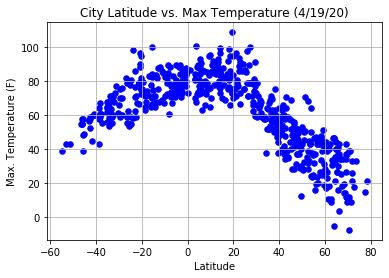

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", c = "blue", s=30)

plt.title("City Latitude vs. Max Temperature (4/19/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/lattitude_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

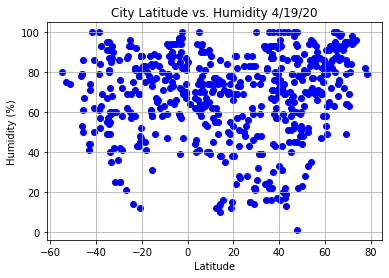

In [40]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker="o", c="blue", )


plt.grid()
plt.title(f"City Latitude vs. Humidity 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lattitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

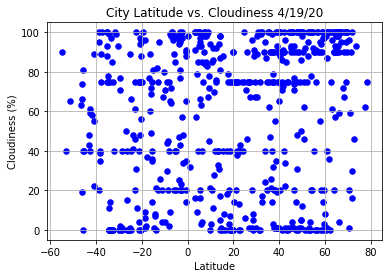

In [42]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker="o", c="blue",s=30)

plt.grid()
plt.title(f"City Latitude vs. Cloudiness 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lattitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

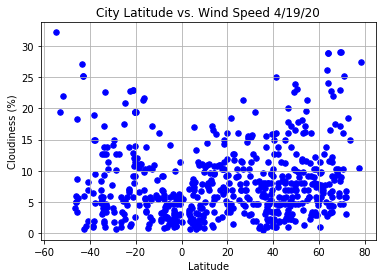

In [43]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker="o", c="blue",s=30)

plt.grid()
plt.title(f"City Latitude vs. Wind Speed 4/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lattitude_vs_Windspeed.png")
plt.show()

['hobart',
 'sobolevo',
 'ancud',
 'manacapuru',
 'klaksvik',
 'vaini',
 'dunedin',
 'east%20london',
 'weligama',
 'busselton',
 'souillac',
 'hamilton',
 'maningrida',
 'vilhena',
 'sungaipenuh',
 'icod%20de%20los%20vinos',
 'bethel',
 'saldanha',
 'lorengau',
 'ahuimanu',
 'half%20moon%20bay',
 'berea',
 'brownsville',
 'ilesha',
 'mar%20del%20plata',
 'nishihara',
 'lodwar',
 'punta%20arenas',
 'yeniseysk',
 'hofn',
 'taolanaro',
 'umm%20durman',
 'puerto%20escondido',
 'ushuaia',
 'rikitea',
 'albany',
 'khatanga',
 'lompoc',
 'hovd',
 'new%20norfolk',
 'iqaluit',
 'narsaq',
 'sorong',
 'barentsburg',
 'cape%20town',
 'puerto%20ayora',
 'santa',
 'port%20blair',
 'bluff',
 'illoqqortoormiut',
 'aklavik',
 'dikson',
 'atuona',
 'arraial%20do%20cabo',
 'samusu',
 'cidreira',
 'thompson',
 'arlit',
 'mahebourg',
 'mataura',
 'bud',
 'cantanhede',
 'pingliang',
 'hithadhoo',
 'kahului',
 'provideniya',
 'georgetown',
 'port%20hedland',
 'bredasdorp',
 'morondava',
 'mount%20gambier',


## Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames

Northern = cities.loc[cities["Lat"] >= 0.0]
Northern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression